In [92]:
"""1.梯度上升法  采用批处理方式更新回归系数值.批处理:一次处理所有数据,回归系数的更新需要遍历整个数据集"""
def GradAscent(dataMatIn,classlabels):
    dataMatrix = mat(dataMatIn)
    labelMatrix = mat(classlabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.01
    maxCycle = 1000 #设置最大循环次数
    weights = ones((n,1))
    for i in range(maxCycle):
        pridiction = sigmoid(dataMatrix * weights)
        error = labelMatrix - pridiction
        weights = weights + alpha * dataMatrix.transpose() * error 
    return weights

In [91]:
"""ones()表示生成全是1的数组,参数可以生成n行m列,类似的用法还有zeros(),empty();'.T表示矩阵的转置,全称为transpose'"""
import numpy as np 
a = ones([1,3]).transpose()
a

array([[1.],
       [1.],
       [1.]])

In [93]:
"""2.随机梯度上升法  采用在线学习方式更新回归系数值.在线学习:一次只处理一个数据,回归系数的更新只需要随机选一个点"""
def StocGradAscent(dataMatrix,labelMatrix):
    m,n = shape(dataMatrix)
    alpha  = 0.01
    weights = ones(n)
    for i in range(m):
        prediction = sigmoid(sum(dataMatrix[i] * weights))
        error = labelMatrix[i] - prediction
        weights = weights + alpha * error * dataMatrix[i] 
    return weights

In [96]:
"""3.随机梯度上升法_improved_V1  1.动态更新alpha值 2.随机选取更新点"""
def StocGradAscent_improved_V1(dataMatrix,labelMatrix,numIter = 150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i) + 0.01   #动态更新alpha值,越来越小,但最小不会超过0.01
            randIndex = int(random.uniform(0,len(dataMatrix)))
            prediction = sigmoid(sum(dataMatrix[randIndex] * weights))  #随机选取更新点,避免连续点引起的周期性抖动
            error = labelMatrix[randIndex] - prediction
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])   
    return weights

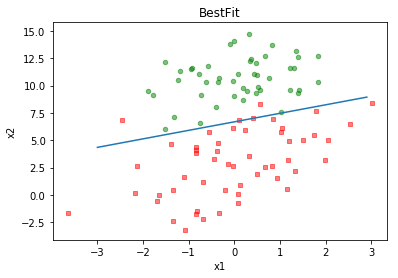

In [95]:
"""逻辑回归算法__1.梯度上升法"""
import numpy as np
import matplotlib.pyplot as plt

"""加载数据集,将数据集中两列数据分别保存到datamat和labelmat"""
def loadDataSet():   
    dataMat = []
    labelMat = []
    fr = open('/home/jerry/文档/testset.csv')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])  #生成一个包含三个元素的列表,且第一个全是1
        labelMat.append(int (lineArr[2]))
    fr.close()
    return dataMat,labelMat

"""求解最佳拟合的一组回归系数,确定了不同类别之间的分割线"""
def gradAscent(dataMatIn,classLables):
    dataMatrix = mat(dataMatIn)
#     print(dataMatrix)
    labelMat = mat(classLables).transpose()
    m,n = shape(dataMatrix)
#     print(m,n)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose()*error
#     print(h)
    return weights.getA()

"""绘制决策边界"""
def plotBestFit(weights):
    dataMat,labelMat = loadDataSet()
    dataArr = np.array(dataMat)  #将datamat转换为numpy数组
    n = np.shape(dataMat)[0]
    xcord1 = [];ycord1 = []  #正样本
    xcord2 = [];ycord2 = []  #负样本
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's', alpha = 0.5)
    ax.scatter(xcord2, ycord2, s = 20, c = 'green', alpha = 0.5)
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1]*x) / weights[2]
    ax.plot(x,y)
    plt.title('BestFit')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
if __name__ == '__main__':
    dataMat,labelMat = loadDataSet()
    weights = gradAscent(dataMat,labelMat)
    plotBestFit(weights)

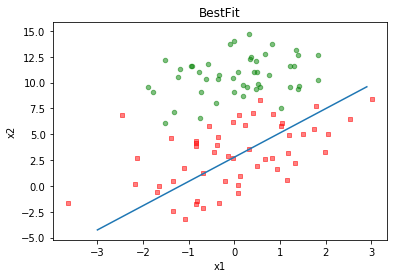

In [98]:
"""逻辑回归算法__2.随机梯度上升法"""
import numpy as np
import matplotlib.pyplot as plt
import random

"""加载数据集,将数据集中两列数据分别保存到datamat和labelmat"""
def loadDataSet():   
    dataMat = []
    labelMat = []
    fr = open('/home/jerry/文档/testset.csv')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])  #生成一个包含三个元素的列表,且第一个全是1
        labelMat.append(int (lineArr[2]))
    fr.close()
    return dataMat,labelMat

"""求解最佳拟合的一组回归系数,确定了不同类别之间的分割线"""
def StocGradAscent(dataMatrix,labelMatrix):
    m,n = shape(dataMatrix)
    alpha  = 0.01
    weights = ones(n)
    for i in range(m):
        prediction = sigmoid(sum(dataMatrix[i] * weights))
        error = labelMatrix[i] - prediction
        weights = weights + alpha * error * dataMatrix[i] 
    return weights

"""绘制决策边界"""
def plotBestFit(weights):
    dataMat,labelMat = loadDataSet()
    dataArr = np.array(dataMat)  #将datamat转换为numpy数组
    n = np.shape(dataMat)[0]
    xcord1 = [];ycord1 = []  #正样本
    xcord2 = [];ycord2 = []  #负样本
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's', alpha = 0.5)
    ax.scatter(xcord2, ycord2, s = 20, c = 'green', alpha = 0.5)
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1]*x) / weights[2]
    ax.plot(x,y)
    plt.title('BestFit')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
if __name__ == '__main__':
    dataMat,labelMat = loadDataSet()
    weights = StocGradAscent(array(dataMat),labelMat)
    plotBestFit(weights)

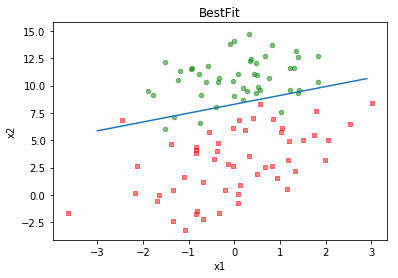

In [99]:
"""逻辑回归算法__3.随机梯度上升法_improved_V1"""
import numpy as np
import matplotlib.pyplot as plt
import random

"""加载数据集,将数据集中两列数据分别保存到datamat和labelmat"""
def loadDataSet():   
    dataMat = []
    labelMat = []
    fr = open('/home/jerry/文档/testset.csv')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])  #生成一个包含三个元素的列表,且第一个全是1
        labelMat.append(int (lineArr[2]))
    fr.close()
    return dataMat,labelMat

"""求解最佳拟合的一组回归系数,确定了不同类别之间的分割线"""
def StocGradAscent_improved_V1(dataMatrix,labelMatrix,numIter = 150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
#         print(dataIndex)
        for i in range(m):
            alpha = 4/(1.0+j+i) + 0.01   #动态更新alpha值,越来越小,但最小不会超过0.01
            randIndex = int(random.uniform(0,len(dataMatrix)))
            prediction = sigmoid(sum(dataMatrix[randIndex] * weights))  #随机选取更新点,避免连续点引起的周期性抖动
            error = labelMatrix[randIndex] - prediction
            weights = weights + alpha * error * dataMatrix[randIndex]
#             del(dataIndex[randIndex])   
    return weights

"""绘制决策边界"""
def plotBestFit(weights):
    dataMat,labelMat = loadDataSet()
    dataArr = np.array(dataMat)  #将datamat转换为numpy数组
    n = np.shape(dataMat)[0]
    xcord1 = [];ycord1 = []  #正样本
    xcord2 = [];ycord2 = []  #负样本
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's', alpha = 0.5)
    ax.scatter(xcord2, ycord2, s = 20, c = 'green', alpha = 0.5)
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1]*x) / weights[2]
    ax.plot(x,y)
    plt.title('BestFit')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
if __name__ == '__main__':
    dataMat,labelMat = loadDataSet()
    weights = StocGradAscent_improved_V1(array(dataMat),labelMat)
    plotBestFit(weights)